# Instance based learning

The title of the dataset is ‘Crime and Communities’. It is prepared using real data from socio-economic data from 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR. This dataset contains a total number of 147 attributes and 2216 instances.

This code aims to predict the number of violent crimes per 100K persons in a community from a number of predictive variables using instance based learning.

Advantageous because of its ability to adapt model to previously unseen data.
However, issues with memory complexity of storing all training instances and risk of overfitting.

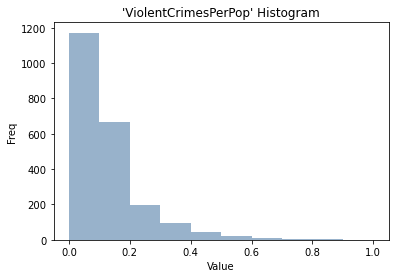

(1549, 100)
(665, 100)


In [2]:
%run alt_Preprocessing.ipynb

In [3]:
# import packages
from sklearn import metrics
from sklearn.svm import SVC
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# set train and test sets
x_train = x_train
y_train = y_train
x_test = x_test
y_test = y_test

# Set classes based on classification complexity decided in pre-processing
classes = {'LowCrime': 0, 'HighCrime': 1}

# Function for plotting confusion matrix
def plot_confusion_matrix(train_pred, train, dom):
    cf = confusion_matrix(train_pred,train)
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
    plt.title(f'{dom} Confusion matrix')
    plt.tight_layout()
    plt.savefig(f'{dom} Confusion matrix.png')
    plt.show()

**Support Vector Machines Algorithm**

*Train the Support Vector Classifier without Hyper-parameter Tuning

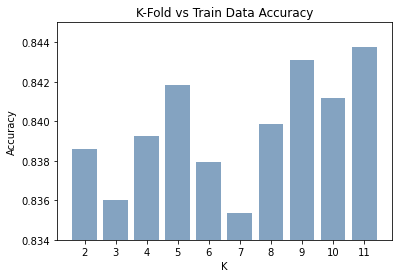

In [7]:
# train default Support Vector Classifier
default_SVC_model = SVC() 
default_SVC_model.fit(x_train, y_train) 
  
# Perform k-fold validation on training data
kfold_scores = {}
for i in range(2,12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(default_SVC_model, x_train, y_train, cv= kf, scoring="accuracy")
    res = {str(i): score.mean()}
    kfold_scores.update(res)

for key in kfold_scores:
    plt.bar([key], kfold_scores[key], label=key, color=(0.2, 0.4, 0.6, 0.6))

plt.title('K-Fold vs Train Data Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.834, 0.845)
plt.show()

In [23]:
# Check k-fold split
kf =KFold(n_splits=11, shuffle=True, random_state=42)
score = cross_val_score(default_SVC_model, x_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score(in %): {"{:.2f}".format(score.mean()*100)}')
print(f'Standard Deviation in score: {"{:.2f}".format(score.std())}')

Scores for each fold are: [0.90780142 0.82269504 0.82978723 0.83687943 0.91489362 0.87234043
 0.78723404 0.82269504 0.83687943 0.80714286 0.84285714]
Average score(in %): 84.37
Standard Deviation in score: 0.04


              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       473
         1.0       0.80      0.71      0.75       192

    accuracy                           0.87       665
   macro avg       0.84      0.82      0.83       665
weighted avg       0.86      0.87      0.86       665

Default Support Vector Machine Train Model Accuracy(in %): 86.31375080697225
Default Support Vector Machine Test Model Accuracy(in %): 86.61654135338345


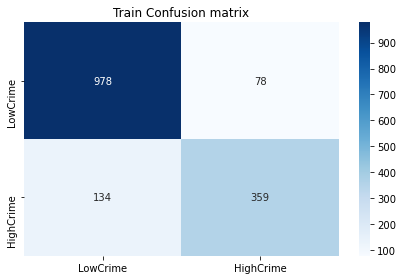

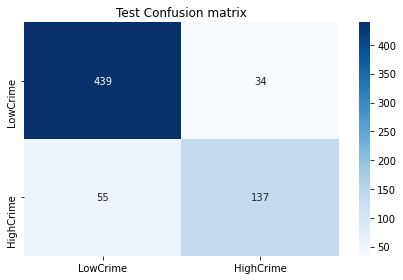

In [14]:
# Compare train &  test data
y_train_pred = default_SVC_model.predict(x_train)
y_test_pred = default_SVC_model.predict(x_test)

print(classification_report(y_test, y_test_pred))
print(f'Default Support Vector Machine Train Model Accuracy(in %): {metrics.accuracy_score(y_train, y_train_pred)*100}')
print(f'Default Support Vector Machine Test Model Accuracy(in %): {metrics.accuracy_score(y_test, y_test_pred)*100}')
plot_confusion_matrix(y_train, y_train_pred,dom='Train')
plot_confusion_matrix(y_test, y_test_pred,dom='Test')

*Train the Support Vector Classifier with Hyper-parameter Tuning

In [15]:
# defining parameter range 
param_grid_SVC = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear','poly','sigmoid']}  
  
grid_SVC = GridSearchCV(SVC(), param_grid_SVC, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_SVC.fit(x_train, y_train) 

# print best parameter after tuning 
print(grid_SVC.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_SVC.best_estimator_) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.806, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.803, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.806, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.823, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.816, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.819, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.855, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.826, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.839, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.838, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.681, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.681, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.683, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.819, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.855, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.826, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.839, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] .

[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.823, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.852, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.832, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.855, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.832, total=   0.1s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.832, total=   0.1s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.855, total=   0.1s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.681, total=   0.2s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.683, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.684, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.681, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.681, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.681, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.683, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .

[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.735, total=   0.1s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.765, total=   0.1s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.777, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.819, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.855, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.829, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.848, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.684, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.681, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.681, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.681, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.683, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.803, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.832, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ...... C=100, gamma=0.01, kernel=poly, score=0.839, total=   0.1s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] ...... C=100, gamma=0.01, kernel=poly, score=0.832, total=   0.1s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.832, total=   0.1s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.855, total=   0.1s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.832, total=   0.1s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.842, total=   0.1s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.816, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ........ C=1000, gamma=1, kernel=poly, score=0.823, total=   0.4s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV] ........ C=1000, gamma=1, kernel=poly, score=0.816, total=   0.5s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV] ........ C=1000, gamma=1, kernel=poly, score=0.797, total=   0.4s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV] ........ C=1000, gamma=1, kernel=poly, score=0.761, total=   0.4s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV] ..... C=1000, gamma=1, kernel=sigmoid, score=0.684, total=   0.2s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV] ..... C=1000, gamma=1, kernel=sigmoid, score=0.681, total=   0.2s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV] ..... C=1000, gamma=1, kernel=sigmoid, score=0.681, total=   0.2s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV] .

[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.806, total=   3.9s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .... C=1000, gamma=0.001, kernel=poly, score=0.684, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .... C=1000, gamma=0.001, kernel=poly, score=0.681, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .... C=1000, gamma=0.001, kernel=poly, score=0.681, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .... C=1000, gamma=0.001, kernel=poly, score=0.681, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .... C=1000, gamma=0.001, kernel=poly, score=0.683, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV] . C=1000, gamma=0.001, kernel=sigmoid, score=0.832, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  3.3min finished


SVC(C=10, gamma=0.1)


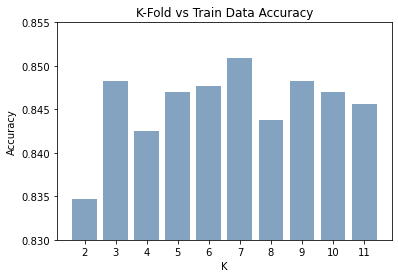

In [18]:
SVM_clf = SVC(C=10, gamma=0.1)
SVM_clf.fit(x_train, y_train)  
  

# Perform k-fold validation on training data
kfold_scores = {}
for i in range(2,12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(SVM_clf, x_train, y_train, cv= kf, scoring="accuracy")
    res = {str(i): score.mean()}
    kfold_scores.update(res)

for key in kfold_scores:
    plt.bar([key], kfold_scores[key], label=key, color=(0.2, 0.4, 0.6, 0.6))

plt.title('K-Fold vs Train Data Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.83, 0.855)
plt.show()

In [21]:
# Check k-fold split
kf =KFold(n_splits=7, shuffle=True, random_state=42)
score = cross_val_score(SVM_clf, x_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score(in %): {"{:.2f}".format(score.mean()*100)}')
print(f'Standard Deviation in score: {"{:.2f}".format(score.std())}')

Scores for each fold are: [0.85135135 0.84684685 0.87782805 0.86425339 0.82352941 0.85520362
 0.83710407]
Average score(in %): 85.09
Standard Deviation in score: 0.02


Support Vector Machine Train Model Accuracy(in %): 88.57327307940606
Support Vector Machine Test Model Accuracy(in %): 86.46616541353383


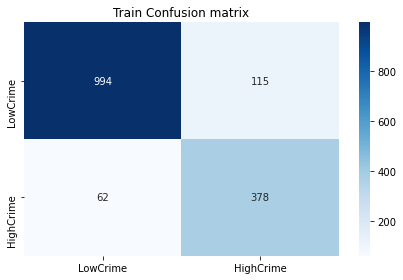

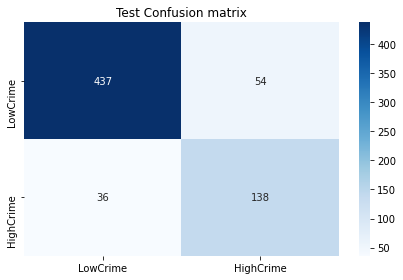

In [22]:
# Compare train & test data
y_train_pred = SVM_clf.predict(x_train)
y_test_pred = SVM_clf.predict(x_test)

print(f'Support Vector Machine Train Model Accuracy(in %): {metrics.accuracy_score(y_train_pred,y_train)*100}')
print(f'Support Vector Machine Test Model Accuracy(in %): {metrics.accuracy_score(y_test_pred,y_test)*100}')
plot_confusion_matrix(y_train_pred,y_train,dom='Train')
plot_confusion_matrix(y_test_pred,y_test,dom='Test')

**K Nearest Neighbour Algorithm**

*Train the K Nearest Neighbour Algorithm without Hyper-parameter Tuning

In [33]:
# train default KNN model
default_KNN_model = KNeighborsClassifier()
default_KNN_model.fit(x_train, y_train)

# print prediction results 
default_KNN_predictions =default_KNN_model.predict(x_test)
print(classification_report(y_test, default_KNN_predictions)) 
print('Accuracy score for the default KNN model:',accuracy_score(y_test, default_KNN_predictions))

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85       182
         1.0       0.74      0.69      0.72       101

    accuracy                           0.81       283
   macro avg       0.79      0.78      0.78       283
weighted avg       0.80      0.81      0.80       283

Accuracy score for the default KNN model: 0.8056537102473498


Text(76.2, 0.5, 'predicted label')

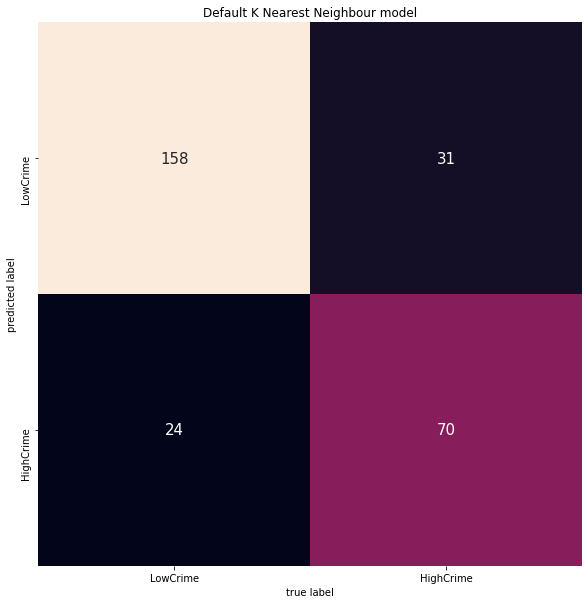

In [34]:
mat = confusion_matrix(y_test, default_KNN_predictions)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=classes, yticklabels=classes, ax=ax, annot_kws={"fontsize":15})
plt.title('Default K Nearest Neighbour model')
plt.xlabel('true label')
plt.ylabel('predicted label')

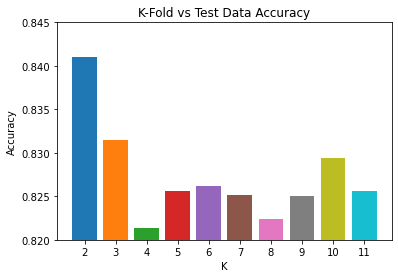

In [38]:
kfold_scores = {}
for i in range(2,12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(default_KNN_model, x, y, cv= kf, scoring="accuracy")
    res = {str(i): score.mean()}
    kfold_scores.update(res)

for key in kfold_scores:
    plt.bar([key], kfold_scores[key], label=key)

plt.title('K-Fold vs Test Data Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.82, 0.845)
plt.show()

In [39]:
kf =KFold(n_splits=2, shuffle=True, random_state=42)
score = cross_val_score(default_KNN_model, x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.83315622 0.84893617]
Average score: 0.84


*Train the K Nearest Neighbour Algorithm with Hyper-parameter Tuning

In [40]:
# defining parameter range
parameters_grid_KNN = {'n_neighbors': list(range(5,10)),
                       'leaf_size': [20,30,40],
                       'p': [1,2],
                       'weights': ['uniform', 'distance'],
                       'algorithm':['auto','ball_tree','kd_tree','brute'],
                       'metric':['euclidean','manhattan','cosine','minkowski','chebyshev']}
  
grid_KNN = GridSearchCV(KNeighborsClassifier(), parameters_grid_KNN, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_KNN.fit(x_train, y_train) 

# print best parameter after tuning 
print(grid_KNN.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_KNN.best_estimator_) 

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
[CV] algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.869, total=   0.4s
[CV] algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.816, total=   0.2s
[CV] algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.863, total=   0.3s
[CV] algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.834, total=   0.3s
[CV] algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.806, total=   0.2s
[CV] algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.869, total=   0.2s
[CV] algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.816, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=eucl

[CV]  algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.843, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.815, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=distance, score=0.863, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=distance, score=0.800, total=   0.2s
[CV] algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=distance, score=0.878, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=eu

[CV]  algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.831, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=distance, score=0.878, total=   0.2s
[CV] algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=distance, score=0.800, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=distance, score=0.891, total=   0.2s
[CV] algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=distance, score=0.846, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=

[CV]  algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=uniform, score=0.815, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=distance, score=0.856, total=   0.2s
[CV] algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=distance, score=0.809, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=distance, score=0.866, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=distance, score=0.828, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=

[CV]  algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=distance, score=0.853, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=distance, score=0.806, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=distance, score=0.884, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=distance, score=0.834, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=distance, score=0.831, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric

[CV]  algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=distance, score=0.837, total=   0.0s
[CV] algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=distance, score=0.812, total=   0.0s
[CV] algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=uniform, score=0.866, total=   0.0s
[CV] algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=uniform, score=0.806, total=   0.0s
[CV] algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=uniform, score=0.838, total=   0.0s
[CV] algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weig

[CV]  algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=0.878, total=   0.0s
[CV] algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=0.853, total=   0.0s
[CV] algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=0.812, total=   0.0s
[CV] algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=distance, score=0.866, total=   0.0s
[CV] algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=distance, score=0.797, total=   0.0s
[CV] algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=7, p=2, wei

[CV] algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=cosine, n_neighbors=9, p=2, weights=distance, score=0.824, total=   0.0s
[CV] algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.863, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.806, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.878, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=

[CV]  algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=6, p=2, weights=distance, score=0.824, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=6, p=2, weights=distance, score=0.815, total=   0.2s
[CV] algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.844, total=   0.2s
[CV] algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.809, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.884, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=minko

[CV]  algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=distance, score=0.843, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=distance, score=0.824, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.859, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.812, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.887, total=   0.2s
[CV] algorithm=auto, leaf_size=20, metric=minko

[CV]  algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.787, total=   0.2s
[CV] algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.777, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=6, p=1, weights=uniform, score=0.816, total=   0.2s
[CV] algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=6, p=1, weights=uniform, score=0.797, total=   0.2s
[CV] algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=6, p=1, weights=uniform, score=0.834, total=   0.2s
[CV] algorithm=auto, leaf_size=20, metric=cheby

[CV]  algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=7, p=2, weights=distance, score=0.784, total=   0.3s
[CV] algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.806, total=   0.2s
[CV] algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.787, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.790, total=   0.1s
[CV] algorithm=auto, leaf_size=20, metric=chebysh

[CV]  algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=distance, score=0.803, total=   0.2s
[CV] algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.869, total=   0.2s
[CV] algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.816, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.863, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=euclide

[CV]  algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.863, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.800, total=   0.2s
[CV] algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.878, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.843, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.815, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=euclidea

[CV]  algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.800, total=   0.2s
[CV] algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.891, total=   0.2s
[CV] algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.846, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.831, total=   0.2s
[CV] algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=distance, score=0.878, total=   0.2s
[CV] algorithm=auto, leaf_size=30, metric=euclid

[CV]  algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, p=1, weights=uniform, score=0.800, total=   0.2s
[CV] algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, p=1, weights=uniform, score=0.881, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, p=1, weights=uniform, score=0.824, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, p=1, weights=uniform, score=0.815, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, p=1, weights=distance, score=0.856, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=manhat

[CV]  algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=8, p=1, weights=uniform, score=0.806, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=8, p=1, weights=uniform, score=0.891, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=8, p=1, weights=uniform, score=0.843, total=   0.2s
[CV] algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=8, p=1, weights=uniform, score=0.821, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=8, p=1, weights=distance, score=0.853, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=manhat

[CV]  algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=5, p=1, weights=uniform, score=0.843, total=   0.0s
[CV] algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=5, p=1, weights=uniform, score=0.809, total=   0.0s
[CV] algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=5, p=1, weights=distance, score=0.866, total=   0.0s
[CV] algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=5, p=1, weights=distance, score=0.803, total=   0.0s
[CV] algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=5, p=1, weights=distance, score=0.838, total=   0.0s
[CV] algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=5, p=1, w

[CV]  algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=0.794, total=   0.0s
[CV] algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=0.878, total=   0.0s
[CV] algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=0.853, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=0.812, total=   0.0s
[CV] algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=distance, score=0.866, total=   0.0s
[CV] algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weigh

[CV]  algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=distance, score=0.803, total=   0.0s
[CV] algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=distance, score=0.897, total=   0.0s
[CV] algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=distance, score=0.853, total=   0.0s
[CV] algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=distance, score=0.824, total=   0.0s
[CV] algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.863, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors

[CV]  algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=6, p=2, weights=distance, score=0.869, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=6, p=2, weights=distance, score=0.824, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=6, p=2, weights=distance, score=0.815, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.844, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.809, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=min

[CV]  algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=8, p=2, weights=distance, score=0.843, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=8, p=2, weights=distance, score=0.824, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.859, total=   0.2s
[CV] algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.812, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.887, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=minko

[CV]  algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.787, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.777, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=6, p=1, weights=uniform, score=0.816, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=6, p=1, weights=uniform, score=0.797, total=   0.2s
[CV] algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=6, p=1, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=cheby

[CV]  algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.806, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.787, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.790, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.799, total=   0.1s
[CV] algorithm=auto, leaf_size=30, metric=chebyshe

[CV]  algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.816, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.863, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.806, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.869, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=euclid

[CV]  algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.800, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.878, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.843, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.815, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=distance, score=0.863, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=euclid

[CV]  algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.800, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.891, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.846, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.831, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=distance, score=0.878, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=euclid

[CV]  algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=6, p=1, weights=uniform, score=0.800, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=6, p=1, weights=uniform, score=0.881, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=6, p=1, weights=uniform, score=0.824, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=6, p=1, weights=uniform, score=0.815, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=6, p=1, weights=distance, score=0.856, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=manhat

[CV]  algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=8, p=1, weights=uniform, score=0.843, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=8, p=1, weights=uniform, score=0.821, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=8, p=1, weights=distance, score=0.853, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=8, p=1, weights=distance, score=0.806, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=8, p=1, weights=distance, score=0.884, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=ma

[CV]  algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=5, p=1, weights=distance, score=0.837, total=   0.0s
[CV] algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=5, p=1, weights=distance, score=0.812, total=   0.0s
[CV] algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=5, p=2, weights=uniform, score=0.866, total=   0.0s
[CV] algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=5, p=2, weights=uniform, score=0.806, total=   0.0s
[CV] algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=5, p=2, weights=uniform, score=0.838, total=   0.0s
[CV] algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=5, p=2, weig

[CV]  algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=0.878, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=0.853, total=   0.0s
[CV] algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=0.812, total=   0.0s
[CV] algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=7, p=2, weights=distance, score=0.866, total=   0.0s
[CV] algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=7, p=2, weights=distance, score=0.797, total=   0.0s
[CV] algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=7, p=2, wei

[CV]  algorithm=auto, leaf_size=40, metric=cosine, n_neighbors=9, p=2, weights=distance, score=0.824, total=   0.0s
[CV] algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.863, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.806, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.878, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=minkowski,

[CV]  algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.844, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.809, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.884, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.840, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.828, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=minkowsk

[CV]  algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.812, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.887, total=   0.2s
[CV] algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.837, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=9, p=1, weights=distance, score=0.859, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=minkow

[CV]  algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=6, p=1, weights=uniform, score=0.797, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=6, p=1, weights=uniform, score=0.831, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=6, p=1, weights=uniform, score=0.787, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=6, p=1, weights=uniform, score=0.796, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=6, p=1, weights=distance, score=0.816, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=chebys

[CV]  algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.831, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.790, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.799, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=8, p=1, weights=distance, score=0.816, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=8, p=1, weights=distance, score=0.812, total=   0.1s
[CV] algorithm=auto, leaf_size=40, metric=cheb

[CV]  algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.806, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.869, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.816, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.863, total=   0.2s

[CV]  algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.800, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.878, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.843, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.815, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=distance, score=0.863, total=   0.1s
[CV

[CV]  algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=8, p=2, weights=distance, score=0.824, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.878, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.800, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.891, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.846, total=   0.1s
[CV]

[CV]  algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=distance, score=0.834, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=distance, score=0.818, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=uniform, score=0.850, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=uniform, score=0.800, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=uniform, score=0.881, total=   0.1s
[C

[CV]  algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=7, p=2, weights=distance, score=0.809, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=7, p=2, weights=distance, score=0.884, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=7, p=2, weights=distance, score=0.840, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=7, p=2, weights=distance, score=0.828, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=uniform, score=0.853, total=   0.1

[CV]  algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=2, weights=distance, score=0.812, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=2, weights=distance, score=0.887, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=2, weights=distance, score=0.834, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=2, weights=distance, score=0.834, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform 


D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, me

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_siz

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_si

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=9, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=9, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=9, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.863, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.806, total=   0.1s
[CV] algorithm=ball_t

[CV]  algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=6, p=2, weights=distance, score=0.869, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=6, p=2, weights=distance, score=0.824, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=6, p=2, weights=distance, score=0.815, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.844, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.809, total=   0.2s


[CV]  algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=distance, score=0.809, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=distance, score=0.891, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=distance, score=0.843, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=distance, score=0.824, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.859, total=   0.1

[CV]  algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.816, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.794, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.850, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.787, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.781, total=   0

[CV]  algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, p=2, weights=uniform, score=0.787, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, p=2, weights=uniform, score=0.784, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, p=2, weights=distance, score=0.809, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, p=2, weights=distance, score=0.803, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, p=2, weights=distance, score=0.844, total=   0.2s

[CV]  algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=uniform, score=0.831, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=uniform, score=0.790, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=uniform, score=0.799, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=distance, score=0.816, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=distance, score=0.794, total=   0.2s
[

[CV]  algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform, score=0.863, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform, score=0.794, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform, score=0.872, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform, score=0.821, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform, score=0.787, total=   0.2s
[CV] 

[CV]  algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=8, p=1, weights=distance, score=0.824, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=uniform, score=0.859, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=uniform, score=0.797, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=uniform, score=0.891, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=uniform, score=0.843, total=   0.1s
[CV]

[CV]  algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.878, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.834, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.818, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=uniform, score=0.863, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=uniform, score=0.806, total=   0.1s


[CV]  algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.844, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.809, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.884, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.840, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.828, total=   0

[CV]  algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.837, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=distance, score=0.859, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=distance, score=0.812, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=distance, score=0.887, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=1, weights=distance, score=0.834, total=   0.

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30,

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, me

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, m

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, m

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.806, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.878, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.818, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=5, p=1, weights=distance, score=0.863, total=   0.1s
[CV

[CV]  algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.844, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.809, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.884, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.840, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.828, total=   0.1s
[CV] 

[CV]  algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=8, p=2, weights=distance, score=0.824, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.859, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.812, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.887, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.834, total=   0.1s
[CV]

[CV]  algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.850, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.787, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.781, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=6, p=1, weights=uniform, score=0.816, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=6, p=1, weights=uniform, score=0.797, total=   0.2s


[CV]  algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=2, weights=distance, score=0.809, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=2, weights=distance, score=0.803, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=2, weights=distance, score=0.844, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=2, weights=distance, score=0.787, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=2, weights=distance, score=0.784, total=   0

[CV]  algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=2, weights=uniform, score=0.799, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=2, weights=distance, score=0.816, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=2, weights=distance, score=0.794, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=2, weights=distance, score=0.828, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=2, weights=distance, score=0.790, total=   0.

[CV]  algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=2, weights=uniform, score=0.821, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=2, weights=uniform, score=0.787, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=2, weights=distance, score=0.859, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=2, weights=distance, score=0.816, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=2, weights=distance, score=0.869, total=   0.1s

[CV]  algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=2, weights=uniform, score=0.891, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=2, weights=uniform, score=0.843, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=2, weights=uniform, score=0.812, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=2, weights=distance, score=0.856, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=2, weights=distance, score=0.809, total=   0.1s
[

[CV]  algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform, score=0.863, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform, score=0.806, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform, score=0.878, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform, score=0.818, total=   0.1s
[CV] 

[CV]  algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=2, weights=uniform, score=0.844, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=2, weights=uniform, score=0.809, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=2, weights=uniform, score=0.884, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=2, weights=uniform, score=0.840, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=2, weights=uniform, score=0.828, total=   0.1s
[CV] 

[CV]  algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=distance, score=0.834, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform, score=0.859, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform, score=0.812, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform, score=0.887, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform, score=0.834, total=   0.1s
[CV]

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=5, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=5, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=5, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=5, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=5, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=4

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=7, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=7, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=7, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=7, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, m

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=7, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=7, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=7, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=7, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, me

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, 

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a c

[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=40

[CV]  algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=6, p=2, weights=uniform, score=0.863, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=6, p=2, weights=uniform, score=0.794, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=6, p=2, weights=uniform, score=0.872, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=6, p=2, weights=uniform, score=0.821, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=6, p=2, weights=uniform, score=0.787, total=   0.1s
[CV] 

[CV]  algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=8, p=1, weights=distance, score=0.831, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=8, p=2, weights=uniform, score=0.859, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=8, p=2, weights=uniform, score=0.797, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=8, p=2, weights=uniform, score=0.891, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=8, p=2, weights=uniform, score=0.843, total=   0.1s
[CV]

[CV]  algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=5, p=1, weights=distance, score=0.777, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=5, p=2, weights=uniform, score=0.816, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=5, p=2, weights=uniform, score=0.794, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=5, p=2, weights=uniform, score=0.850, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=5, p=2, weights=uniform, score=0.787, total=   0.1s
[CV]

[CV]  algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=7, p=1, weights=distance, score=0.787, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=7, p=1, weights=distance, score=0.787, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=7, p=2, weights=uniform, score=0.809, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=7, p=2, weights=uniform, score=0.803, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=7, p=2, weights=uniform, score=0.847, total=   0.2s
[C

[CV]  algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, p=1, weights=distance, score=0.787, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, p=1, weights=distance, score=0.799, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, p=2, weights=uniform, score=0.819, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, p=2, weights=uniform, score=0.794, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, p=2, weights=uniform, score=0.831, total=   0.1s
[C

[CV]  algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=6, p=1, weights=distance, score=0.869, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=6, p=1, weights=distance, score=0.824, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=6, p=1, weights=distance, score=0.815, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=uniform, score=0.863, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=uniform, score=0.794, total=   0.3s
[CV] algorithm=kd_

[CV]  algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=8, p=1, weights=distance, score=0.891, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=8, p=1, weights=distance, score=0.843, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=8, p=1, weights=distance, score=0.824, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=8, p=2, weights=uniform, score=0.859, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=8, p=2, weights=uniform, score=0.797, total=   0.1s
[CV] algorithm=kd_

[CV]  algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.806, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.878, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.834, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.818, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=uniform, score=0.863, total=   0.1s
[CV] algorithm=k

[CV]  algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.809, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.884, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.840, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.828, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=7, p=2, weights=uniform, score=0.844, total=   0.2s
[CV] algorithm=k

[CV]  algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=1, weights=distance, score=0.812, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=1, weights=distance, score=0.887, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=1, weights=distance, score=0.834, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=1, weights=distance, score=0.834, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=9, p=2, weights=uniform, score=0.859, total=   0.1s
[CV] algorithm=k

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a cal

[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=6, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a cal

[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a cal

[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=8, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_neig

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a cal

[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, metric=cosine,

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a cal

[CV]  algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.863, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.806, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.878, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.818, total=   0.1s
[CV] algorithm=kd_tree,

[CV]  algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=6, p=2, weights=distance, score=0.815, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.844, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.809, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.884, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.840, total=   0.1s
[CV] algorithm=kd_tree

[CV]  algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=8, p=2, weights=distance, score=0.824, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.859, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.812, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.887, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=kd_tree

[CV]  algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.787, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.777, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=6, p=1, weights=uniform, score=0.816, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=6, p=1, weights=uniform, score=0.797, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=6, p=1, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=kd_tr

[CV]  algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, p=2, weights=distance, score=0.784, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.806, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.787, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.790, total=   0.1s
[CV] algorithm=kd_tree

[CV]  algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=distance, score=0.787, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=distance, score=0.803, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.869, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.816, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.863, total=   0.1s
[CV] algorithm=kd_tr

[CV]  algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=distance, score=0.869, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=distance, score=0.824, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=distance, score=0.815, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.863, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.800, total=   0.1s
[CV] algorithm=kd_

[CV]  algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=distance, score=0.809, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=distance, score=0.891, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=distance, score=0.843, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=distance, score=0.824, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.878, total=   0.2s
[CV] algorithm=k

[CV]  algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance, score=0.863, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance, score=0.806, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance, score=0.878, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance, score=0.834, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance, score=0.818, total=   0.1s
[CV] algorithm

[CV]  algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=uniform, score=0.828, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance, score=0.844, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance, score=0.809, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance, score=0.884, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance, score=0.840, total=   0.1s
[CV] algorithm=

[CV]  algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=uniform, score=0.837, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance, score=0.859, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance, score=0.812, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance, score=0.887, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance, score=0.834, total=   0.1s
[CV] algorithm=

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a cal

[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=6, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neigh

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a cal

[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neigh

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a cal

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a cal

[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=7, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neigh

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a cal

[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine,

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a cal

[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neig

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a cal

[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=cosine, n_neighbors=9, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, metric=cosine, n_n

[CV] algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=6, p=2, weights=uniform, score=0.794, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=6, p=2, weights=uniform, score=0.872, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=6, p=2, weights=uniform, score=0.821, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=6, p=2, weights=uniform, score=0.787, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=mink

[CV]  algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=8, p=1, weights=distance, score=0.831, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=8, p=2, weights=uniform, score=0.859, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=8, p=2, weights=uniform, score=0.797, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=8, p=2, weights=uniform, score=0.891, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=8, p=2, weights=uniform, score=0.843, total=   0.1s
[CV] algorithm=kd_tree

[CV]  algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, p=1, weights=distance, score=0.787, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, p=1, weights=distance, score=0.777, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, p=2, weights=uniform, score=0.816, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, p=2, weights=uniform, score=0.794, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=5, p=2, weights=uniform, score=0.856, total=   0.3s
[CV] algorithm=kd_tr

[CV]  algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=1, weights=distance, score=0.853, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=1, weights=distance, score=0.784, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=1, weights=distance, score=0.784, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=2, weights=uniform, score=0.806, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, p=2, weights=uniform, score=0.803, total=   0.1s
[CV] algorithm=kd_

[CV]  algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=1, weights=distance, score=0.794, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=1, weights=distance, score=0.834, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=1, weights=distance, score=0.787, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=1, weights=distance, score=0.803, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=9, p=2, weights=uniform, score=0.819, total=   0.1s
[CV] algorithm=k

[CV]  algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=1, weights=distance, score=0.859, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=1, weights=distance, score=0.816, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=1, weights=distance, score=0.869, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=1, weights=distance, score=0.824, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=6, p=1, weights=distance, score=0.815, total=   0.1s
[CV] algorithm

[CV]  algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=1, weights=uniform, score=0.812, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=1, weights=distance, score=0.856, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=1, weights=distance, score=0.809, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=1, weights=distance, score=0.891, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=8, p=1, weights=distance, score=0.843, total=   0.1s
[CV] algorithm=

[CV]  algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=uniform, score=0.834, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=uniform, score=0.818, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.863, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.806, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.878, total=   0.1s
[CV] algorithm=kd

[CV]  algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.884, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.840, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.828, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.844, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.809, total=   0.1s
[CV] algorithm=kd_t

[CV]  algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.887, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.837, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=distance, score=0.859, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=distance, score=0.812, total=   0.1s
[CV] algorithm=kd_t

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a cal

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a cal

[CV]  algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=7, p=1, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=40, metric=cosine, 

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a cal

[CV]  algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=1, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=uniform, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=40, metric=cosine, n_

D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "D:\Anaconda\envs\geospatial\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a cal

[CV]  algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=cosine, n_neighbors=9, p=2, weights=distance, score=nan, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.863, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.806, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=5, p=1, weights=uniform, score=0.878, total=   0.1s
[CV] algorithm=kd_tree, leaf_size

[CV]  algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=6, p=2, weights=distance, score=0.869, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=6, p=2, weights=distance, score=0.824, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=6, p=2, weights=distance, score=0.815, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.844, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=7, p=1, weights=uniform, score=0.809, total=   0.2s
[CV] algorithm=kd_

[CV]  algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=8, p=2, weights=distance, score=0.891, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=8, p=2, weights=distance, score=0.843, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=8, p=2, weights=distance, score=0.824, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.859, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=9, p=1, weights=uniform, score=0.812, total=   0.1s
[CV] algorithm=kd_

[CV]  algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.794, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.853, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.787, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=5, p=2, weights=distance, score=0.777, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=6, p=1, weights=uniform, score=0.816, total=   0.2s
[CV] algorithm=k

[CV]  algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=7, p=2, weights=distance, score=0.850, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=7, p=2, weights=distance, score=0.784, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=7, p=2, weights=distance, score=0.784, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.806, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=8, p=1, weights=uniform, score=0.787, total=   0.1s
[CV] algorithm=kd_

[CV]  algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, p=2, weights=distance, score=0.831, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, p=2, weights=distance, score=0.787, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, p=2, weights=distance, score=0.803, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.869, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.816, total=   0.0s
[CV] algorithm=brute, leaf

[CV]  algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=distance, score=0.816, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=distance, score=0.869, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=distance, score=0.824, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=distance, score=0.815, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.863, total=   0.0s
[CV] algorithm=brute, leaf_size=20

[CV]  algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=8, p=2, weights=distance, score=0.843, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=8, p=2, weights=distance, score=0.824, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.878, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform, score=0.891, total=   0.0s
[CV] algorithm=brute, leaf_size=20, me

[CV]  algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=distance, score=0.818, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=uniform, score=0.850, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=uniform, score=0.800, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=uniform, score=0.881, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=uniform, score=0.824, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metr

[CV]  algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=7, p=2, weights=distance, score=0.828, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=uniform, score=0.853, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=uniform, score=0.806, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=uniform, score=0.891, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=8, p=1, weights=uniform, score=0.843, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metr

[CV]  algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=9, p=2, weights=distance, score=0.834, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform, score=0.866, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform, score=0.806, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform, score=0.838, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=5, p=1, weights=uniform, score=0.843, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=5

[CV]  algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=uniform, score=0.853, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=uniform, score=0.812, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance, score=0.866, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance, score=0.797, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=7, p=1, weights=distance, score=0.878, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=cosine, n_neighbors

[CV]  algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=uniform, score=0.850, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=uniform, score=0.831, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=distance, score=0.866, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=distance, score=0.803, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=cosine, n_neighbors=9, p=1, weights=distance, score=0.897, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=cosine, n_neighbors

[CV]  algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance, score=0.809, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance, score=0.866, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance, score=0.828, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance, score=0.821, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=6, p=2, weights=uniform, score=0.863, total=   0.0s
[CV] algorithm=brute, leaf_size=20

[CV]  algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=8, p=1, weights=distance, score=0.853, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=8, p=1, weights=distance, score=0.806, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=8, p=1, weights=distance, score=0.884, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=8, p=1, weights=distance, score=0.834, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=8, p=1, weights=distance, score=0.831, total=   0.0s
[CV] algorithm=brute, leaf_size=

[CV]  algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=5, p=1, weights=distance, score=0.794, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=5, p=1, weights=distance, score=0.847, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=5, p=1, weights=distance, score=0.787, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=5, p=1, weights=distance, score=0.781, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=5, p=2, weights=uniform, score=0.816, total=   0.0s
[CV] algorithm=brute, leaf_size=20

[CV]  algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=7, p=1, weights=distance, score=0.847, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=7, p=1, weights=distance, score=0.787, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=7, p=1, weights=distance, score=0.787, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=7, p=2, weights=uniform, score=0.803, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=7, p=2, weights=uniform, score=0.806, total=   0.1s
[CV] algorithm=brute, leaf_size=20, 

[CV]  algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=9, p=1, weights=distance, score=0.799, total=   0.0s
[CV] algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=uniform, score=0.812, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=uniform, score=0.794, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=uniform, score=0.828, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=9, p=2, weights=uniform, score=0.784, total=   0.1s
[CV] algorithm=brute, leaf_size=20, metr

[CV]  algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform, score=0.863, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform, score=0.794, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform, score=0.872, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform, score=0.821, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform, score=0.787, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metri

[CV]  algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=uniform, score=0.859, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=uniform, score=0.797, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=uniform, score=0.891, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=uniform, score=0.843, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=8, p=2, weights=uniform, score=0.812, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metri

[CV]  algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=uniform, score=0.878, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=uniform, score=0.818, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance, score=0.863, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance, score=0.806, total=   0.1s
[CV] algorithm=brute, leaf_size=30, m

[CV]  algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=uniform, score=0.809, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=uniform, score=0.884, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=uniform, score=0.840, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=uniform, score=0.828, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance, score=0.844, total=   0.0s
[CV] algorithm=brute, leaf_size=30, met

[CV]  algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=uniform, score=0.887, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=uniform, score=0.837, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance, score=0.859, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance, score=0.812, total=   0.0s
[CV] algorithm=brute, leaf_size=30, m

[CV]  algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=uniform, score=0.784, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=distance, score=0.856, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=distance, score=0.809, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=distance, score=0.853, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=6, p=2, weights=distance, score=0.837, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=cosine, n_neighbo

[CV]  algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=uniform, score=0.803, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=distance, score=0.856, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=distance, score=0.806, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=distance, score=0.891, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=8, p=2, weights=distance, score=0.837, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=cosine, n_neighbo

[CV]  algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=6, p=1, weights=uniform, score=0.800, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=6, p=1, weights=uniform, score=0.881, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=6, p=1, weights=uniform, score=0.824, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=6, p=1, weights=uniform, score=0.815, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=6, p=1, weights=distance, score=0.856, total=   0.1s
[CV] algorithm=brute, leaf_size=30, met

[CV]  algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=8, p=1, weights=uniform, score=0.853, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=8, p=1, weights=uniform, score=0.806, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=8, p=1, weights=uniform, score=0.891, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=8, p=1, weights=uniform, score=0.843, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=8, p=1, weights=uniform, score=0.821, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metri

[CV]  algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=5, p=1, weights=uniform, score=0.794, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=5, p=1, weights=uniform, score=0.847, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=5, p=1, weights=uniform, score=0.787, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=5, p=1, weights=uniform, score=0.781, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=5, p=1, weights=distance, score=0.816, total=   0.1s
[CV] algorithm=brute, leaf_size=30, met

[CV]  algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=7, p=1, weights=uniform, score=0.806, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=7, p=1, weights=uniform, score=0.847, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=7, p=1, weights=uniform, score=0.787, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=7, p=1, weights=uniform, score=0.787, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=7, p=1, weights=distance, score=0.803, total=   0.1s
[CV] algorithm=brute, leaf_size=30, met

[CV]  algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=9, p=1, weights=uniform, score=0.828, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=9, p=1, weights=uniform, score=0.784, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=9, p=1, weights=uniform, score=0.799, total=   0.1s
[CV] algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=9, p=1, weights=distance, score=0.812, total=   0.0s
[CV] algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=9, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=9, p=1, weights=distance, score=0.794, total=   0.0s
[CV] algorithm=brute, leaf_size=30, m

[CV]  algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=6, p=1, weights=distance, score=0.816, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=6, p=1, weights=distance, score=0.869, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=6, p=1, weights=distance, score=0.824, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=6, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=6, p=1, weights=distance, score=0.815, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=6, p=2, weights=uniform, score=0.863, total=   0.0s
[CV] algorithm=brute, leaf_size=40

[CV]  algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=8, p=1, weights=distance, score=0.843, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=8, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=8, p=1, weights=distance, score=0.824, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=8, p=2, weights=uniform, score=0.859, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=8, p=2, weights=uniform, score=0.797, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=8, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=8, p=2, weights=uniform, score=0.891, total=   0.0s
[CV] algorithm=brute, leaf_size=40, me

[CV]  algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.834, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.818, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform, score=0.863, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform, score=0.806, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform, score=0.878, total=   0.1s
[CV] algorithm=brute, leaf_size=40, me

[CV]  algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.828, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=7, p=2, weights=uniform, score=0.844, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=7, p=2, weights=uniform, score=0.809, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=7, p=2, weights=uniform, score=0.884, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=7, p=2, weights=uniform, score=0.840, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metr

[CV]  algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=distance, score=0.834, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform, score=0.859, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform, score=0.812, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform, score=0.887, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=uniform, score=0.834, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metr

[CV]  algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=uniform, score=0.850, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=uniform, score=0.837, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=uniform, score=0.784, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=distance, score=0.856, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=6, p=2, weights=distance, score=0.809, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=6

[CV]  algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=distance, score=0.806, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=distance, score=0.891, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=distance, score=0.837, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=8, p=2, weights=distance, score=0.821, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=cosine, n_neighbors=9, p=1, weights=uniform, score=0.869, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=cosine, n_neighbor

[CV]  algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=6, p=1, weights=uniform, score=0.850, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=6, p=1, weights=uniform, score=0.800, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=6, p=1, weights=uniform, score=0.881, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=6, p=1, weights=uniform, score=0.824, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=6, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=6, p=1, weights=uniform, score=0.815, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metri

[CV]  algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=8, p=1, weights=uniform, score=0.853, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=8, p=1, weights=uniform, score=0.806, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=8, p=1, weights=uniform, score=0.891, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=8, p=1, weights=uniform, score=0.843, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=8, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=8, p=1, weights=uniform, score=0.821, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metri

[CV]  algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=5, p=1, weights=uniform, score=0.816, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=5, p=1, weights=uniform, score=0.794, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=5, p=1, weights=uniform, score=0.847, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=5, p=1, weights=uniform, score=0.787, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=5, p=1, weights=uniform, score=0.781, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metri

[CV]  algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=6, p=2, weights=distance, score=0.796, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=7, p=1, weights=uniform, score=0.803, total=   0.2s
[CV] algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=7, p=1, weights=uniform, score=0.806, total=   0.2s
[CV] algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=7, p=1, weights=uniform, score=0.847, total=   0.2s
[CV] algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=7, p=1, weights=uniform, score=0.787, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metr

[CV]  algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=8, p=2, weights=distance, score=0.809, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=9, p=1, weights=uniform, score=0.812, total=   0.0s
[CV] algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=9, p=1, weights=uniform, score=0.794, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=9, p=1, weights=uniform, score=0.828, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=9, p=1, weights=uniform, score=0.784, total=   0.1s
[CV] algorithm=brute, leaf_size=40, metr

[Parallel(n_jobs=1)]: Done 6000 out of 6000 | elapsed:  8.4min finished


In [41]:
grid_KNN_predictions = grid_KNN.predict(x_test) 
  
# print classification report 
print(classification_report(y_test, grid_KNN_predictions)) 
print('Accuracy score for the KNN model after hyper-parameter tuning:',accuracy_score(y_test, grid_KNN_predictions)) 

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       182
         1.0       0.82      0.68      0.75       101

    accuracy                           0.83       283
   macro avg       0.83      0.80      0.81       283
weighted avg       0.83      0.83      0.83       283

Accuracy score for the KNN model after hyper-parameter tuning: 0.833922261484099


Text(76.2, 0.5, 'predicted label')

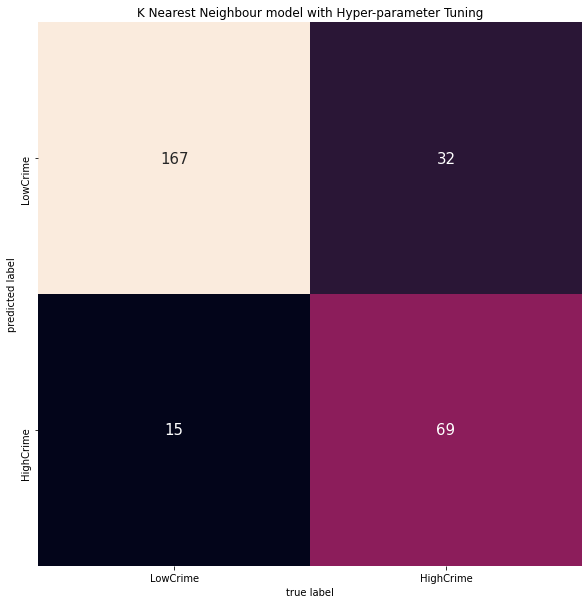

In [46]:
mat = confusion_matrix(y_test, grid_KNN_predictions)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=classes, yticklabels=classes, ax=ax, annot_kws={"fontsize":15})
plt.title('K Nearest Neighbour model with Hyper-parameter Tuning')
plt.xlabel('true label')
plt.ylabel('predicted label')

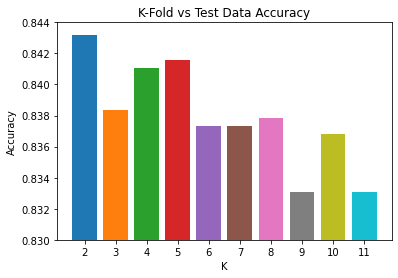

In [44]:
KNN = KNeighborsClassifier(leaf_size=20, metric='cosine', n_neighbors=9, p=1)

kfold_scores = {}
for i in range(2,12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(KNN, x, y, cv= kf, scoring="accuracy")
    res = {str(i): score.mean()}
    kfold_scores.update(res)

for key in kfold_scores:
    plt.bar([key], kfold_scores[key], label=key)

plt.title('K-Fold vs Test Data Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.83, 0.844)
plt.show()

In [45]:
kf =KFold(n_splits=2, shuffle=True, random_state=42)
score = cross_val_score(KNN, x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.83209352 0.85425532]
Average score: 0.84


**Collaborative Filtering Algorithm**

*Pre-processing for collaborative filtering algorithm

In [24]:
import pandas as pd
import numpy as np
from surprise import NMF, SVD, SVDpp, KNNBasic, KNNWithMeans, KNNWithZScore, CoClustering
from surprise.model_selection import cross_validate
from surprise import Reader, Dataset

# Read data and assign NA to missing values 
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
                   sep='\s*,\s*',encoding='latin-1',engine='python', na_values=["?"])


data.columns = ['communityname','state','countyCode','communityCode','fold','population','householdsize','racepctblack',
           'racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up',
           'numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst',
           'pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap',
           'HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed',
           'PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce',
           'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par',
           'PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumKidsBornNeverMar','PctKidsBornNeverMar','NumImmig',
           'PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5',
           'PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam',
           'PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup',
           'PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
           'PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal',
           'OwnOccHiQuart','OwnOccQrange','RentLowQ','RentMedian','RentHighQ','RentQrange','MedRent','MedRentPctHousInc',
           'MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState',
           'PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps',
           'LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop',
           'RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor',
           'OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans',
           'PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn',
           'PolicBudgPerPop','murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults',
           'assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons',
           'arsonsPerPop','ViolentCrimesPerPop','nonViolPerPop']

# Select the relevant columns to use in the model 
cols_final = data[[
 'population',
 'racepctblack',
 'agePct12t29',
 'numbUrban',
 'medIncome',
 'pctWWage',
 'pctWInvInc',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'PctEmploy',
 'MalePctDivorce',
 'MalePctNevMarr',
 'TotalPctDiv',
 'PctKids2Par',
 'PctWorkMom',
 'NumImmig',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctLargHouseOccup',
 'PersPerOccupHous',
 'PersPerRentOccHous',
 'PctPersOwnOccup',
 'PctPersDenseHous',
 'HousVacant',
 'PctHousOwnOcc',
 'OwnOccLowQuart',
 'OwnOccMedVal',
 'RentLowQ',
 'RentMedian',
 'MedRent',
 'MedOwnCostPctIncNoMtg',
 'NumStreet',
 'ViolentCrimesPerPop']]

# Remove missing values
# First establish how much data is missing
cols_final.isnull().sum().sort_values(ascending=False).head()


# Impute the missing values using SimpleImputer in sklearn.impute
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(cols_final)
cols_final = pd.DataFrame(data=imp.transform(cols_final), columns=cols_final.columns)

# Add community name as a user
communityname = data[['communityname','population']]
cols_final = communityname.merge(cols_final)

# Check if there is still missing data
cols_final.isnull().sum().sort_values(ascending=False)

#Transfer features value into 1-5 according to quantiles
cols_final['population'] = pd.qcut(cols_final['population'].values, 5, duplicates = 'drop').codes + 1
cols_final['racepctblack'] = pd.qcut(cols_final['racepctblack'].values, 5, duplicates = 'drop').codes + 1
cols_final['agePct12t29'] = pd.qcut(cols_final['agePct12t29'].values, 5, duplicates = 'drop').codes + 1
cols_final['numbUrban'] = pd.qcut(cols_final['numbUrban'].values, 5, duplicates = 'drop').codes + 1
cols_final['medIncome'] = pd.qcut(cols_final['medIncome'].values, 5, duplicates = 'drop').codes + 1
cols_final['pctWWage'] = pd.qcut(cols_final['pctWWage'].values, 5, duplicates = 'drop').codes + 1
cols_final['pctWInvInc'] = pd.qcut(cols_final['pctWInvInc'].values, 5, duplicates = 'drop').codes + 1
cols_final['medFamInc'] = pd.qcut(cols_final['medFamInc'].values, 5, duplicates = 'drop').codes + 1
cols_final['perCapInc'] = pd.qcut(cols_final['perCapInc'].values, 5, duplicates = 'drop').codes + 1
cols_final['whitePerCap'] = pd.qcut(cols_final['whitePerCap'].values, 5, duplicates = 'drop').codes + 1
cols_final['PctEmploy'] = pd.qcut(cols_final['PctEmploy'].values, 5, duplicates = 'drop').codes + 1
cols_final['MalePctDivorce'] = pd.qcut(cols_final['MalePctDivorce'].values, 5, duplicates = 'drop').codes + 1
cols_final['MalePctNevMarr'] = pd.qcut(cols_final['MalePctNevMarr'].values, 5, duplicates = 'drop').codes + 1
cols_final['TotalPctDiv'] = pd.qcut(cols_final['TotalPctDiv'].values, 5, duplicates = 'drop').codes + 1
cols_final['PctKids2Par'] = pd.qcut(cols_final['PctKids2Par'].values, 5, duplicates = 'drop').codes + 1
cols_final['PctWorkMom'] = pd.qcut(cols_final['PctWorkMom'].values, 5, duplicates = 'drop').codes + 1
cols_final['NumImmig'] = pd.qcut(cols_final['NumImmig'].values, 5, duplicates = 'drop').codes + 1
cols_final['PctRecImmig8'] = pd.qcut(cols_final['PctRecImmig8'].values, 5, duplicates = 'drop').codes + 1
cols_final['PctRecImmig10'] = pd.qcut(cols_final['PctRecImmig10'].values, 5, duplicates = 'drop').codes + 1
cols_final['PctLargHouseOccup'] = pd.qcut(cols_final['PctLargHouseOccup'].values, 5, duplicates = 'drop').codes + 1
cols_final['PersPerOccupHous'] = pd.qcut(cols_final['PersPerOccupHous'].values, 5, duplicates = 'drop').codes + 1
cols_final['PctPersOwnOccup'] = pd.qcut(cols_final['PctPersOwnOccup'].values, 5, duplicates = 'drop').codes + 1
cols_final['PctPersDenseHous'] = pd.qcut(cols_final['PctPersDenseHous'].values, 5, duplicates = 'drop').codes + 1
cols_final['HousVacant'] = pd.qcut(cols_final['HousVacant'].values, 5, duplicates = 'drop').codes + 1
cols_final['PctHousOwnOcc'] = pd.qcut(cols_final['PctHousOwnOcc'].values, 5, duplicates = 'drop').codes + 1
cols_final['OwnOccLowQuart'] = pd.qcut(cols_final['OwnOccLowQuart'].values, 5, duplicates = 'drop').codes + 1
cols_final['OwnOccMedVal'] = pd.qcut(cols_final['OwnOccMedVal'].values, 5, duplicates = 'drop').codes + 1
cols_final['RentLowQ'] = pd.qcut(cols_final['RentLowQ'].values, 5, duplicates = 'drop').codes + 1
cols_final['RentMedian'] = pd.qcut(cols_final['RentMedian'].values, 5, duplicates = 'drop').codes + 1
cols_final['MedRent'] = pd.qcut(cols_final['MedRent'].values, 5, duplicates = 'drop').codes + 1
cols_final['MedOwnCostPctIncNoMtg'] = pd.qcut(cols_final['MedOwnCostPctIncNoMtg'].values, 5, duplicates = 'drop').codes + 1
cols_final['NumStreet'] = pd.qcut(cols_final['NumStreet'].values, 5, duplicates = 'drop').codes + 1
cols_final['ViolentCrimesPerPop'] = pd.qcut(cols_final['ViolentCrimesPerPop'].values, 5, duplicates = 'drop').codes + 1

# change to unpivoted table
data = cols_final.melt(id_vars=['communityname'], var_name='features', value_name='values')

In [25]:
#Choose the best algorithm for recommender system

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data, reader)

cv = []
# Iterate over all recommender system algorithms
for recsys in [NMF(), SVD(), SVDpp(), KNNWithZScore(), CoClustering()]:
    # Perform cross validation
    tmp = cross_validate(recsys, data, measures=['RMSE'], cv=3, verbose=False)
    cv.append((str(recsys).split(' ')[0].split('.')[-1], tmp['test_rmse'].mean()))
pd.DataFrame(cv, columns=['RecSys', 'RMSE'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,RecSys,RMSE
0,NMF,0.948013
1,SVD,0.916365
2,SVDpp,0.926987
3,KNNWithZScore,0.922246
4,CoClustering,1.142161


In [26]:
# change to unpivoted table
data = cols_final.melt(id_vars=['communityname'], var_name='features', value_name='values')

#Split train and test data
split_value = int(len(cols_final) * 0.80)
data = data[:-468]

from surprise import SVD
from surprise import Reader, Dataset

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data, reader)

algo = SVD()
algo.fit(data.build_full_trainset())
crime_prediction = []
for communityname in cols_final['communityname'][split_value:]:
    crime_prediction.append((communityname, algo.predict(communityname,'ViolentCrimesPerPop').est))
    
pd.DataFrame(crime_prediction, columns=['communityname', 'predictions']).sort_values('predictions', ascending=False).head(10)

,communityname,predictions
296,Saginawcity,5.000000
330,MossPointcity,4.914190
101,Stocktoncity,4.874198
78,PompanoBeachcity,4.826847
328,AsburyParkcity,4.805158
163,Plainfieldcity,4.788352
357,Phoenixcity,4.716771
280,Montgomerycity,4.713089
154,UnionCitycity,4.710021
240,Riversidecity,4.708177
